In [1]:
import tradingeconomics as te
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
te.login(); # Signup for a free API key at https://developer.tradingeconomics.com/

In [3]:
data = te.fetchMarkets(symbol=['AMZN:US', 'BABA:US'], initDate='2019-01-01', output_type='df')

In [4]:
amazon = data.loc[data['symbol'] == 'AMZN:US']
alibaba = data.loc[data['symbol'] == 'BABA:US']


ama = amazon[['close']].rename(columns={'close': 'amazon'})
ama.index.name = 'Date'
ali = alibaba[['close']].rename(columns={'close': 'alibaba'})
ali.index.name = 'Date'


df = pd.merge(ama,ali, on='Date')

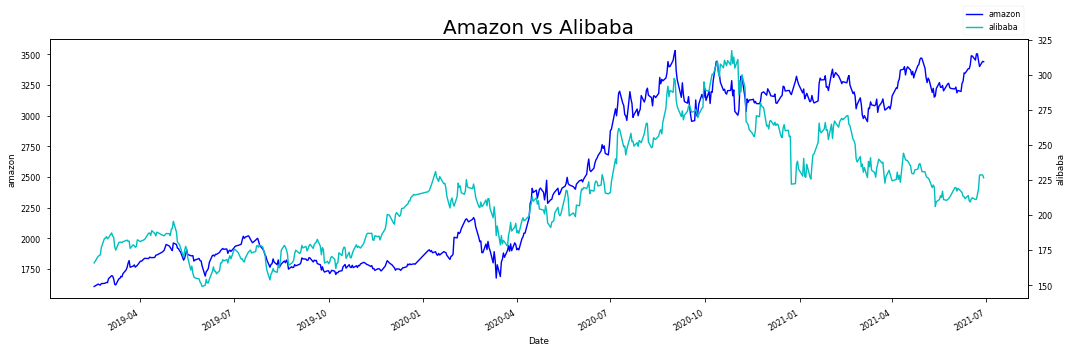

In [5]:
from helper import plot_multi
plt.style.use('seaborn-paper')
ax = plot_multi(df, figsize=(15, 5))
ax.set_title('Amazon vs Alibaba', color='black', size=20)
plt.tight_layout()